In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
df = pd.read_csv('smartphone_cleaned_v5.csv')

## About the dataset
The dataset provides insights into smartphone features, including processor details, RAM, storage, battery capacity, camera specifications, and display attributes.
It is useful for price comparisons, trend analysis, and smartphone recommendations based on user preferences.

### Column Descriptions
    
- brand_name → The brand of the smartphone (e.g., OnePlus, Samsung, Apple). 
- model → The specific model name of the smartphone (e.g., OnePlus 11 5G).
- price → Price of the smartphone in Indian Rupees (₹).
- rating → User rating of the smartphone (on a scale of 0 to 100).
- has_5g → Indicates whether the smartphone supports 5G connectivity (True/False).
- has_nfc → Indicates if the device has NFC (Near Field Communication) support (True/False).
- has_ir_blaster → Specifies whether the smartphone has an IR blaster for remote control functionality (True/False).
- processor_brand → The brand of the processor used in the smartphone (e.g., Snapdragon, MediaTek, Exynos).
- num_cores → The number of CPU cores in the processor (e.g., 8 cores for an Octa-Core processor).
- processor_speed → The clock speed of the processor in GHz (e.g., 3.2 GHz).
- battery_capacity → Battery capacity in mAh (milliampere-hours) (e.g., 5000 mAh).
- fast_charging_available → Indicates if the smartphone supports fast charging (1 = Yes, 0 = No).
- fast_charging → Fast charging power in Watts (W) (e.g., 100W fast charging).
- ram_capacity → The RAM size in GB (e.g., 12 GB RAM).
- internal_memory → Internal storage capacity in GB (e.g., 256 GB inbuilt storage).
- screen_size → Screen size in inches (e.g., 6.7 inches).
- refresh_rate → Display refresh rate in Hz (e.g., 120 Hz for smooth scrolling and gaming).
- resolution → Screen resolution in pixels (e.g., 1440 × 3216 px for a QHD+ display).
- num_rear_cameras → The number of rear cameras available on the smartphone.
- num_front_cameras → The number of front cameras available for selfies.
- os → The operating system of the smartphone (e.g., Android, iOS).
- primary_camera_rear → The primary rear camera resolution in megapixels (MP) (e.g., 50 MP).
- primary_camera_front → The primary front camera resolution in megapixels (MP) (e.g., 16 MP).
- extended_memory_available → Indicates whether the phone supports expandable storage (memory card) (1 = Yes, 0 = No).
- extended_upto → Maximum expandable storage capacity in GB (e.g., 1024 GB = 1 TB).

In [15]:
df.head(2)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,5000.0,1,33.0,6.0,128.0,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0


In [17]:
df.shape

(980, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

In [21]:
df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


In [24]:
# segregate numerical and categorical columns
numerical_cols = df.columns[df.dtypes != 'object']
categorical_cols = df.columns[df.dtypes == 'object']

In [25]:
df[categorical_cols].describe()

,brand_name,model,processor_brand,resolution,os
count,980,980,960,980,966
unique,46,980,13,83,3
top,xiaomi,OnePlus 11 5G,snapdragon,1080 x 2400,android
freq,134,1,413,342,909


# Univarite analysis

### Brand Name

<Axes: xlabel='brand_name'>

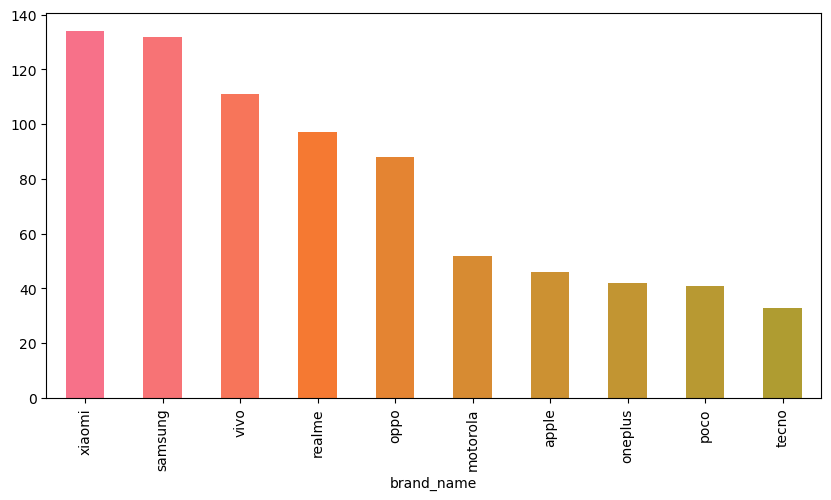

In [28]:
# top 10 brands
colors = sns.color_palette('husl',len(df['brand_name'].value_counts()))
df['brand_name'].value_counts().head(10).plot(kind='bar',color = colors,figsize=(10,5))

Text(0, 0.5, '')

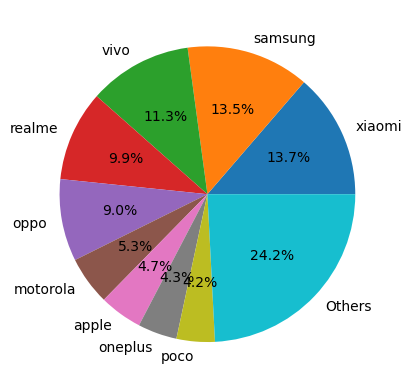

In [29]:
# Distribution of Smart Phones
brand_counts = df['brand_name'].value_counts()
total = brand_counts.sum()

threshold = 3.5 
filtered_count = brand_counts[brand_counts / total * 100 >= threshold]
others_count = brand_counts[brand_counts / total * 100 < threshold].sum()

if others_count > 0:
    filtered_count["Others"] = others_count

filtered_count.plot(kind='pie', autopct='%0.1f%%')
plt.ylabel('')

In [30]:
df['brand_name'].isnull().sum()

0

### model

In [32]:
df['model'].nunique()

980

### processor_brand

<Axes: xlabel='processor_brand'>

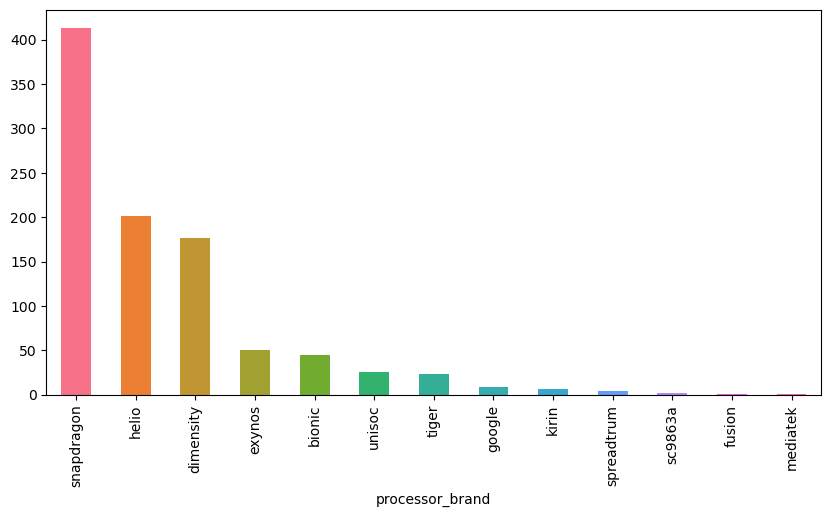

In [34]:
# top processor brands
colors = sns.color_palette('husl',len(df['processor_brand'].value_counts()))
df['processor_brand'].value_counts().plot(kind='bar',color = colors,figsize = (10,5))

Text(0, 0.5, '')

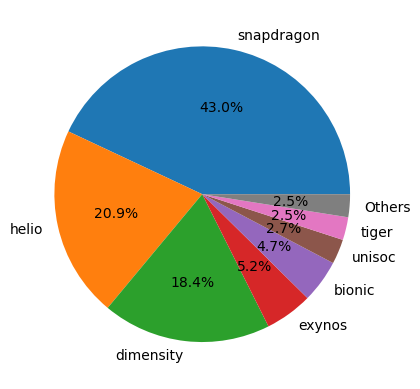

In [35]:
# Distribution of Processor Brand
processor_counts = df['processor_brand'].value_counts()
total = processor_counts.sum()

threshold = 2.5  # 4% threshold
filtered_count = processor_counts[processor_counts / total * 100 >= threshold]
others_count = processor_counts[processor_counts / total * 100 < threshold].sum()

if others_count > 0:
    filtered_count["Others"] = others_count

filtered_count.plot(kind='pie', autopct='%0.1f%%')
plt.ylabel('')

### os

In [37]:
df['os'].value_counts()

os
android    909
ios         46
other       11
Name: count, dtype: int64

Text(0.5, 0, 'Operating System')

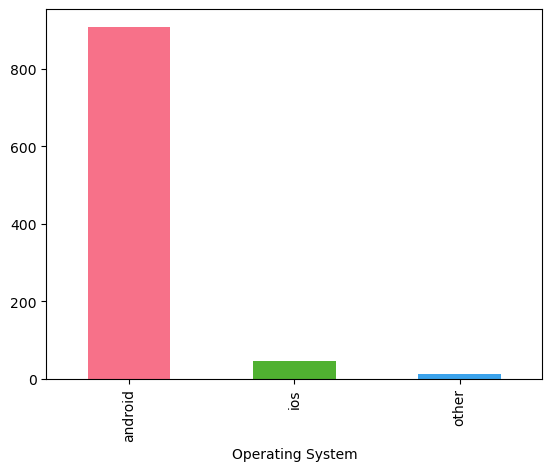

In [38]:
colors = sns.color_palette('husl',len(df['os'].value_counts()))
df['os'].value_counts().plot(kind='bar',color = colors)
plt.xlabel('Operating System')

In [39]:
df[numerical_cols].describe()

,price,rating,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,num_front_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980.000000,879.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,976.000000,980.000000,975.000000,980.000000,500.000000
mean,32520.504082,78.258248,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,1.029713,50.319286,16.589128,0.630612,736.064000
std,39531.812669,7.402854,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,0.169882,33.000968,10.876802,0.482885,366.894911
min,3499.000000,60.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,1.000000,2.000000,0.300000,0.000000,32.000000
25%,12999.000000,74.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,1.000000,24.000000,8.000000,0.000000,512.000000
50%,19994.500000,80.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,1.000000,50.000000,16.000000,1.000000,1024.000000
75%,35491.500000,84.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,1.000000,64.000000,16.000000,1.000000,1024.000000
max,650000.000000,89.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,2.000000,200.000000,60.000000,1.000000,2048.000000


### price

In [41]:
df['price'].describe().round(2)

count       980.00
mean      32520.50
std       39531.81
min        3499.00
25%       12999.00
50%       19994.50
75%       35491.50
max      650000.00
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

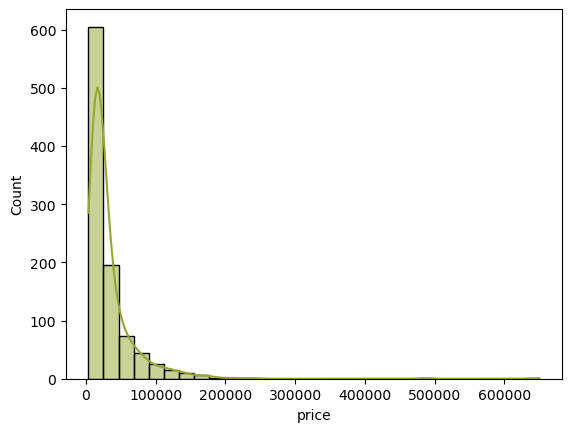

In [42]:
colors = sns.color_palette('husl',8)
sns.histplot(df['price'],kde=True,bins=30,color=colors[2],edgecolor='black')

<Axes: xlabel='price'>

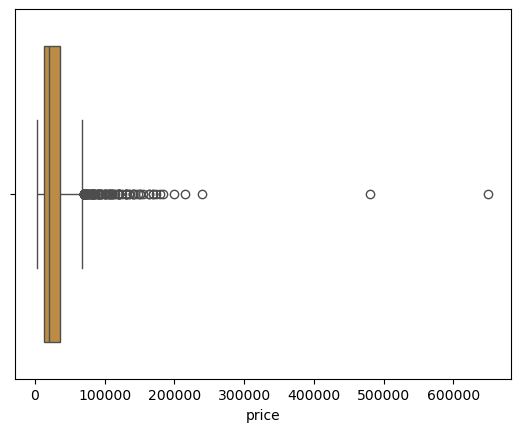

In [43]:
colors = sns.color_palette('husl',8)
sns.boxplot(x = df['price'],color=colors[1])

### rating

<Axes: xlabel='rating', ylabel='Count'>

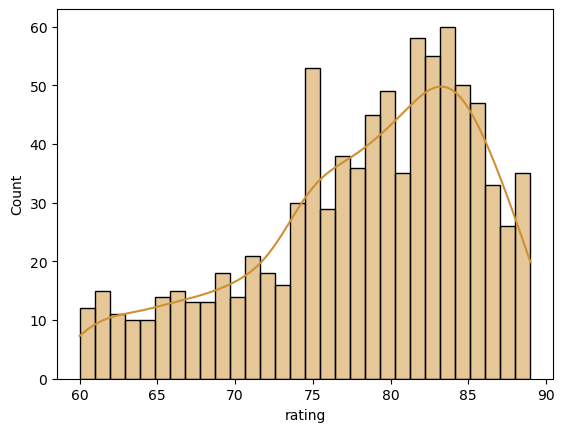

In [45]:
colors = sns.color_palette('husl',8)
sns.histplot(df['rating'],kde=True,bins=30,color=colors[1],edgecolor='black')

<Axes: xlabel='rating'>

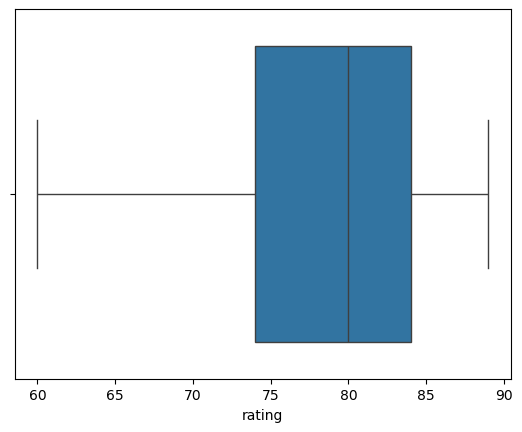

In [46]:
sns.boxplot(x = df['rating'])

In [47]:
df.rating.isnull().sum()

101

### has 5g / Nfc / Ir_blaster

Text(0.5, 1.0, '5g Availability')

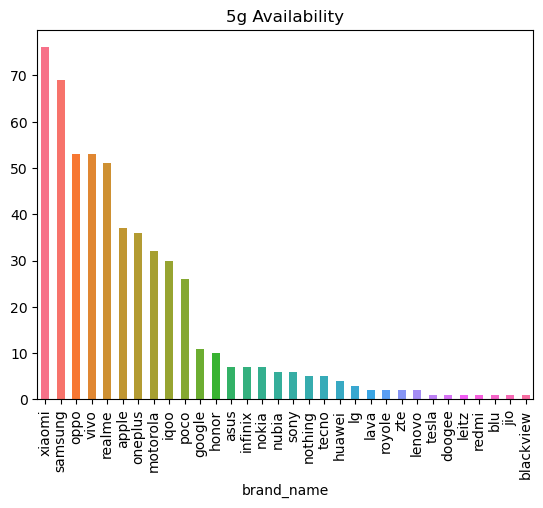

In [49]:
colors = sns.color_palette('husl',32)
df[df['has_5g']== True]['brand_name'].value_counts().plot(kind='bar',color=colors)
plt.title('5g Availability')

Text(0.5, 1.0, 'Nfc Availability')

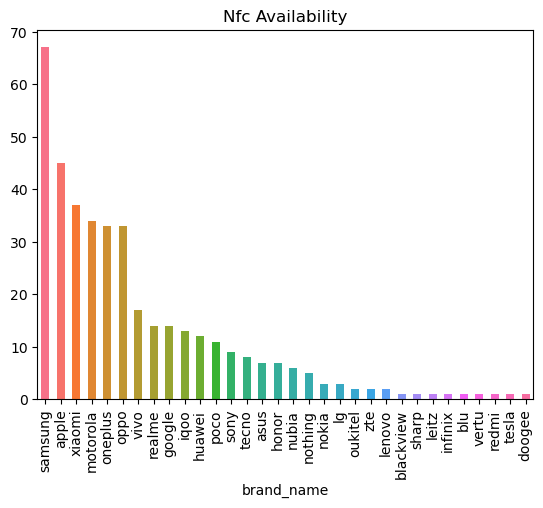

In [50]:
colors = sns.color_palette('husl',32)
df[df['has_nfc']== True]['brand_name'].value_counts().plot(kind='bar',color=colors)
plt.title('Nfc Availability')

Text(0.5, 1.0, 'IR_Blaster Availability')

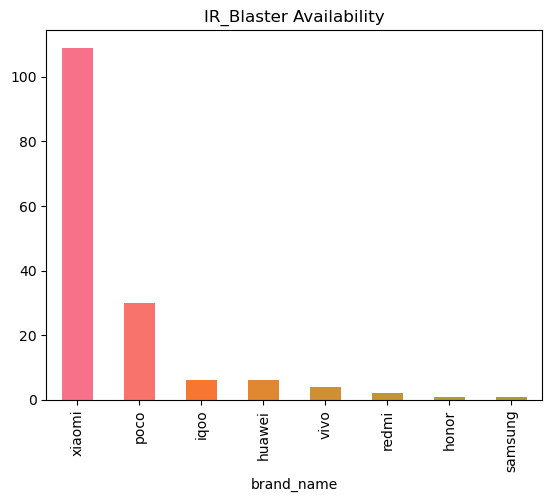

In [51]:
colors = sns.color_palette('husl',32)
df[df['has_ir_blaster']== True]['brand_name'].value_counts().plot(kind='bar',color=colors)
plt.title('IR_Blaster Availability')

Text(0, 0.5, '')

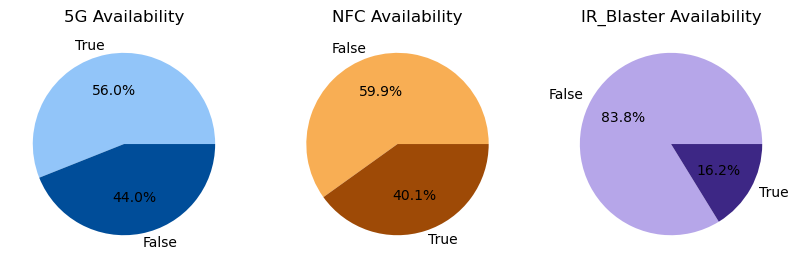

In [52]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
df['has_5g'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['#92C5F9', '#004D99'])
plt.title("5G Availability")
plt.ylabel('')
plt.subplot(1,3,2)
df['has_nfc'].value_counts().plot(kind='pie',autopct='%0.1f%%',colors=['#F8AE54', '#9E4A06'])
plt.title("NFC Availability")
plt.ylabel('')
plt.subplot(1,3,3)
df['has_ir_blaster'].value_counts().plot(kind='pie',autopct='%0.01f%%',colors=['#B6A6E9','#3D2785'])
plt.title("IR_Blaster Availability")
plt.ylabel('')

### num_cores

Text(0, 0.5, '')

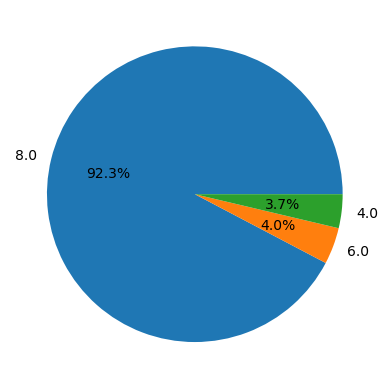

In [54]:
df['num_cores'].value_counts().plot(kind='pie',autopct='%0.01f%%')
plt.ylabel('')

### fast_charging availability

<Axes: ylabel='count'>

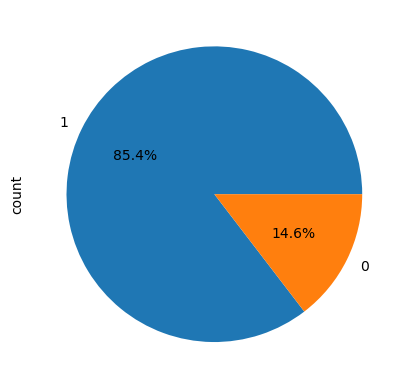

In [56]:
df['fast_charging_available'].value_counts().plot(kind='pie',autopct='%0.01f%%')

### ram capacity

<Axes: ylabel='count'>

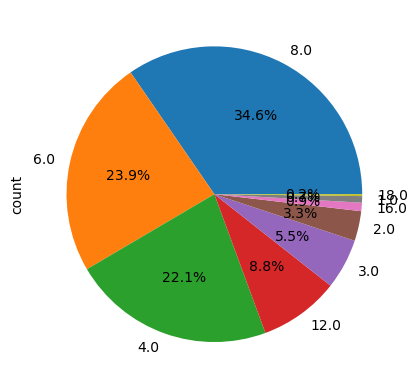

In [58]:
df['ram_capacity'].value_counts().plot(kind='pie',autopct='%0.01f%%')

In [59]:
df.head(1)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,5000.0,1,100.0,12.0,256.0,6.7,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN


### Total cameras in smart phones

<Axes: xlabel='brand_name'>

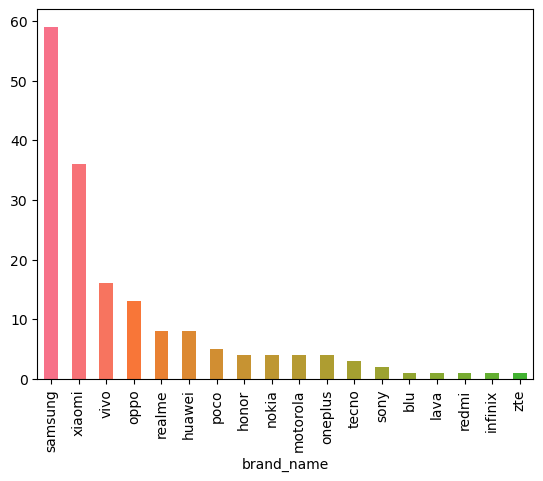

In [61]:
# smart phones has more than 4 camers
colors = sns.color_palette('husl',50)
df[(df['num_rear_cameras']+df['num_front_cameras']>4)]['brand_name'].value_counts().plot(kind='bar',color = colors)

<Axes: ylabel='count'>

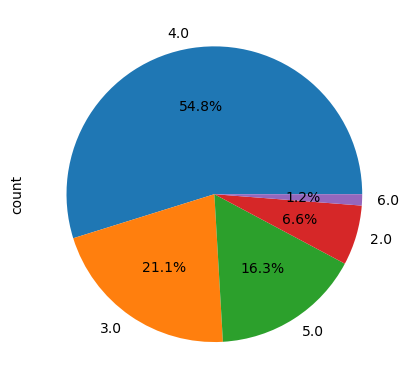

In [62]:
(df['num_rear_cameras']+df['num_front_cameras']).value_counts().plot(kind='pie',autopct='%0.01f%%')

### extended memory available

<Axes: xlabel='brand_name'>

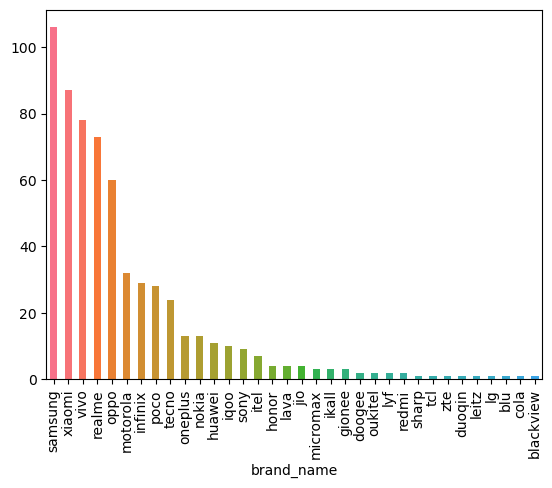

In [64]:
colors = sns.color_palette('husl',50)
df[df['extended_memory_available']== True]['brand_name'].value_counts().plot(kind= 'bar',color=colors)

Text(0, 0.5, '')

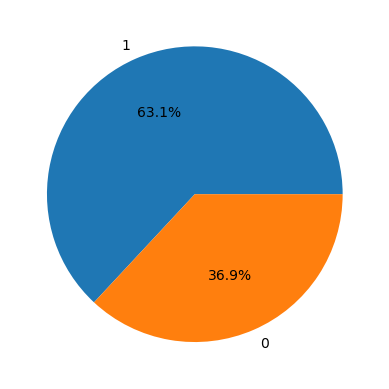

In [65]:
df['extended_memory_available'].value_counts().plot(kind='pie',autopct='%0.01f%%')
plt.ylabel('')

In [66]:
num_columns = df.select_dtypes(include=['float64','int64']).iloc[:,[3,4,6,9,13,14,16]].columns

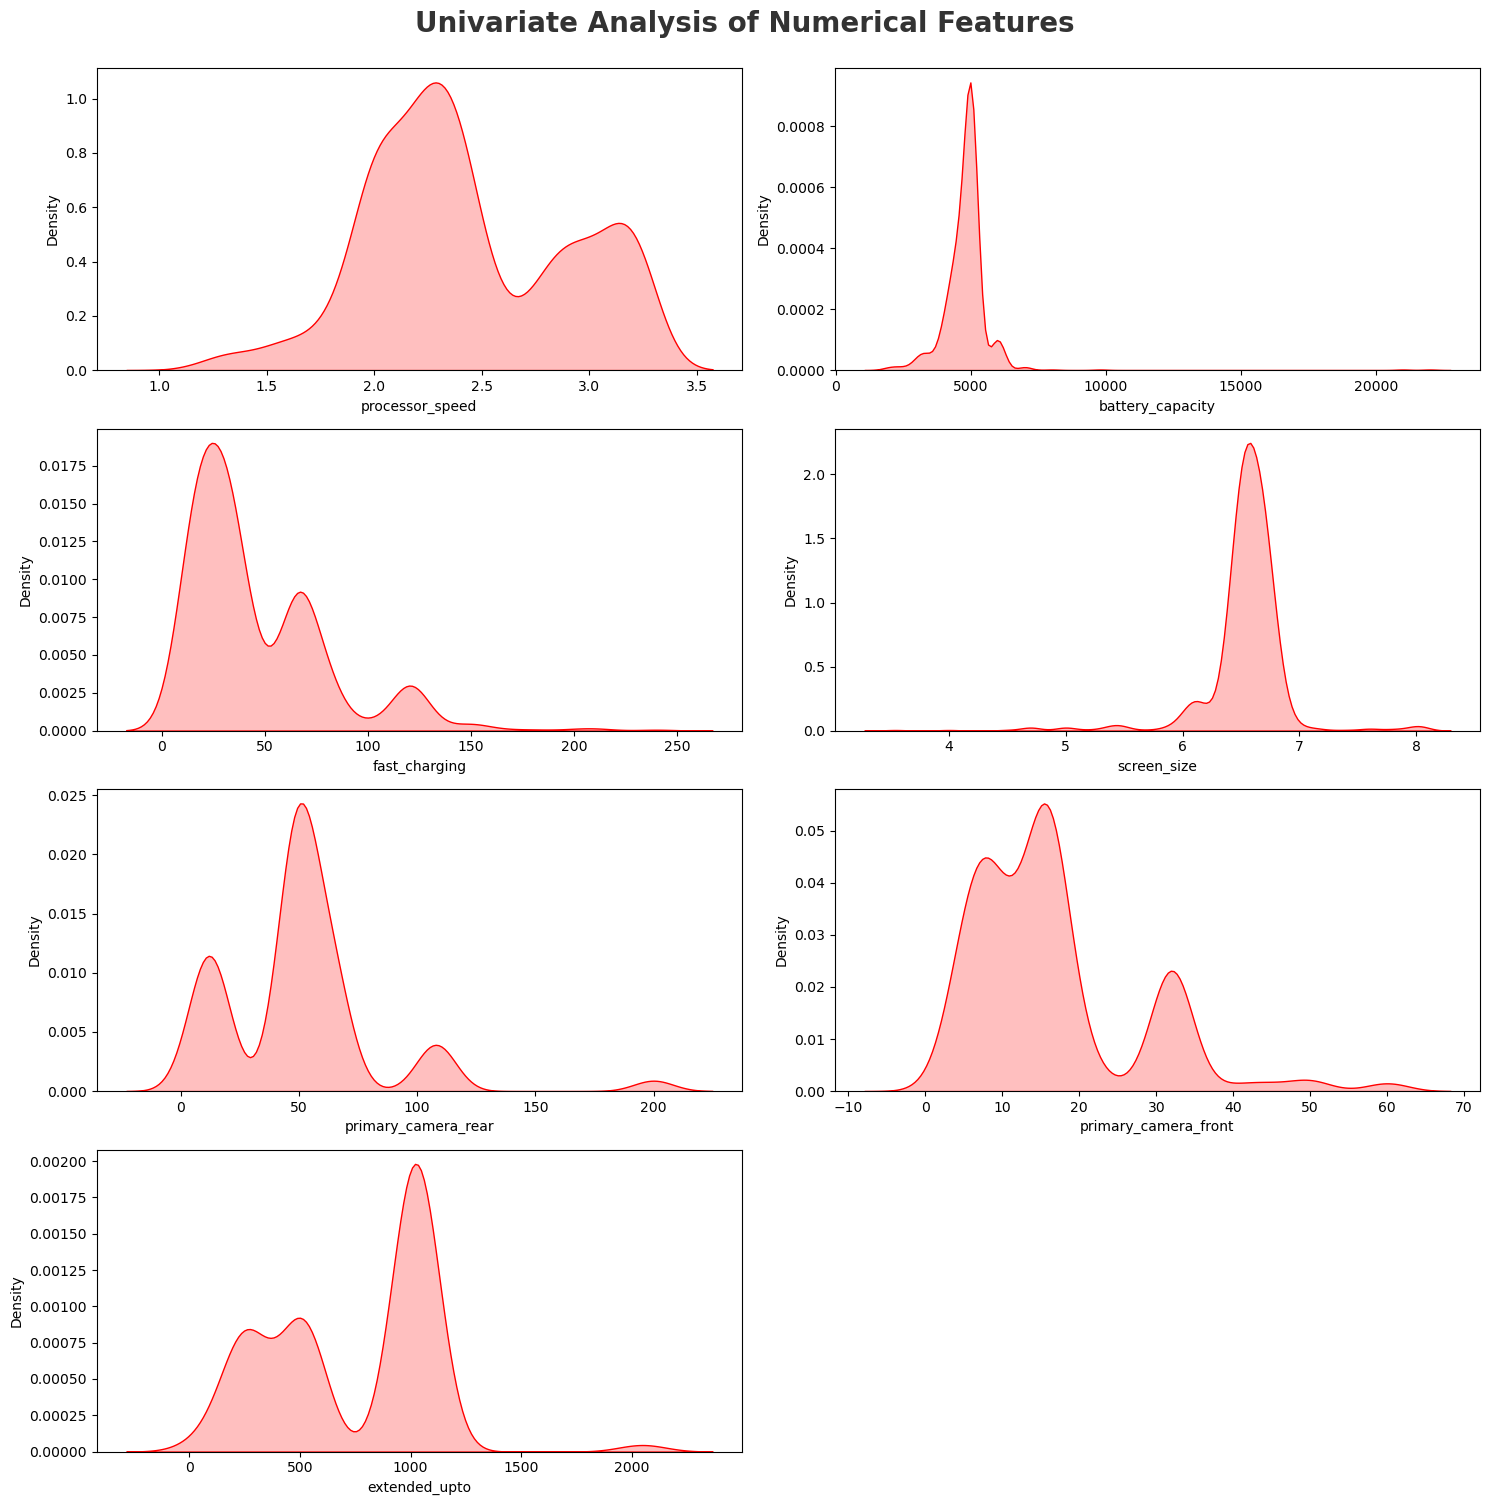

In [67]:
# visualization Diagram
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(num_columns)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(x=df[num_columns[i]],shade=True,color='r')
    plt.xlabel(num_columns[i])
    plt.tight_layout()

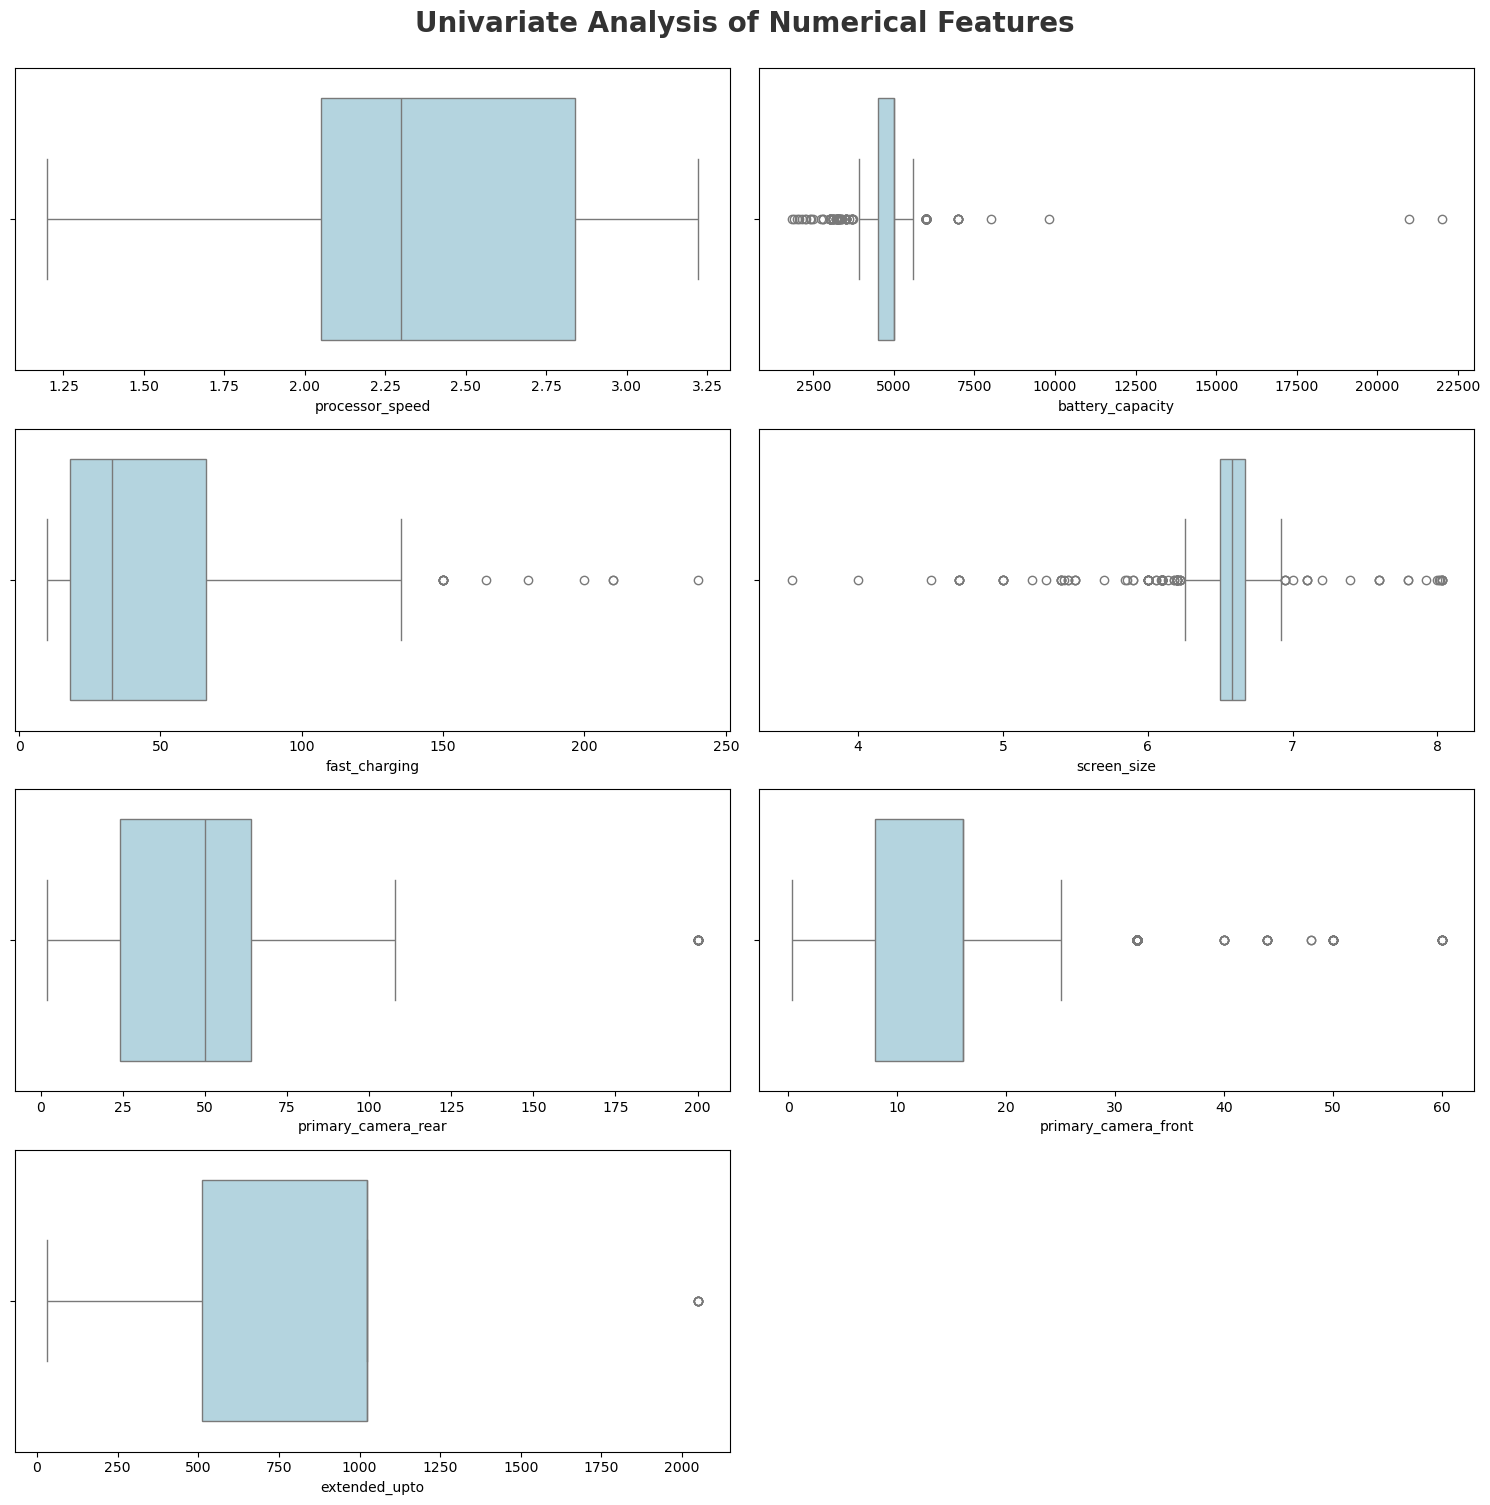

In [68]:
# visualization Diagram
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0,len(num_columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[num_columns[i]],color='lightblue')
    plt.xlabel(num_columns[i])
    plt.tight_layout()

# Bivariate Analysis

<Axes: >

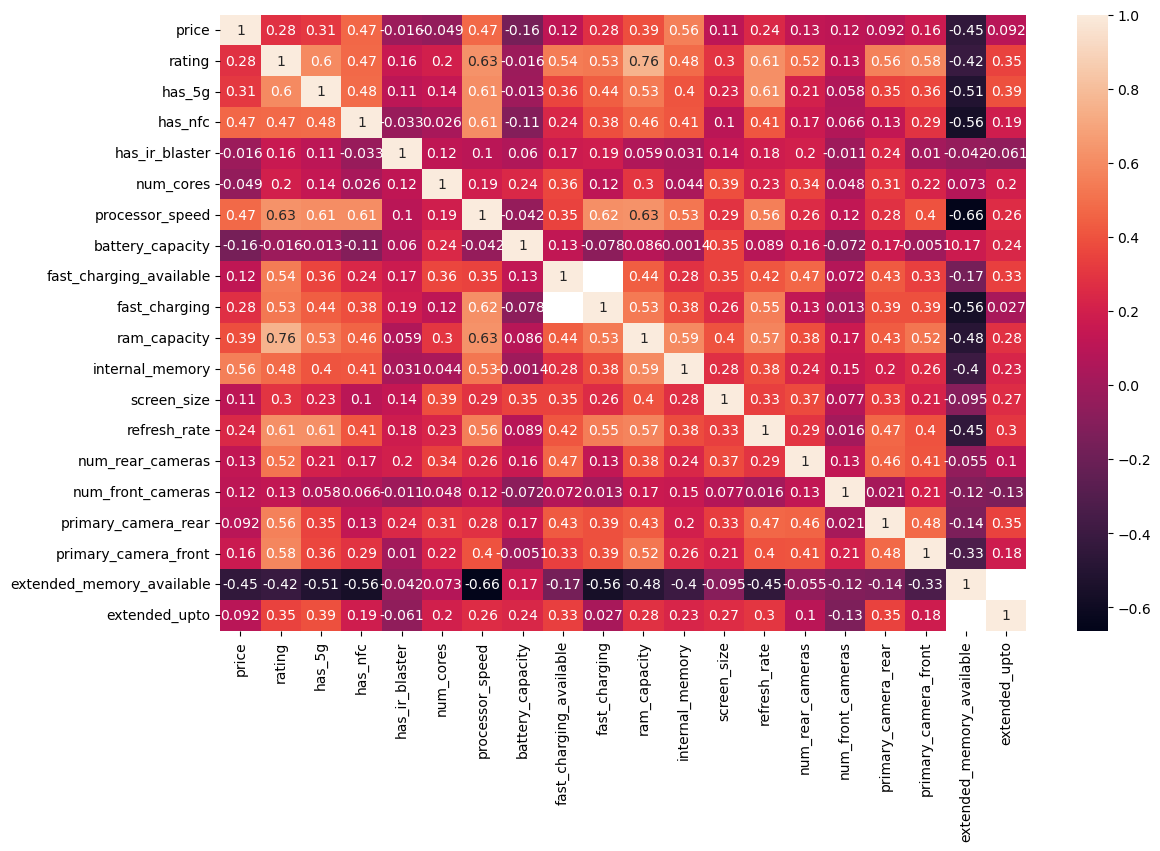

In [70]:
plt.figure(figsize = [13,8])
sns.heatmap(df[numerical_cols].corr(),annot = True)

### Brand_name vs Price

In [72]:
# fetch brand which has at least 5 phones
x = df.groupby('brand_name').count()['model']
temp_df = df[df['brand_name'].isin(x[x>5].index)]

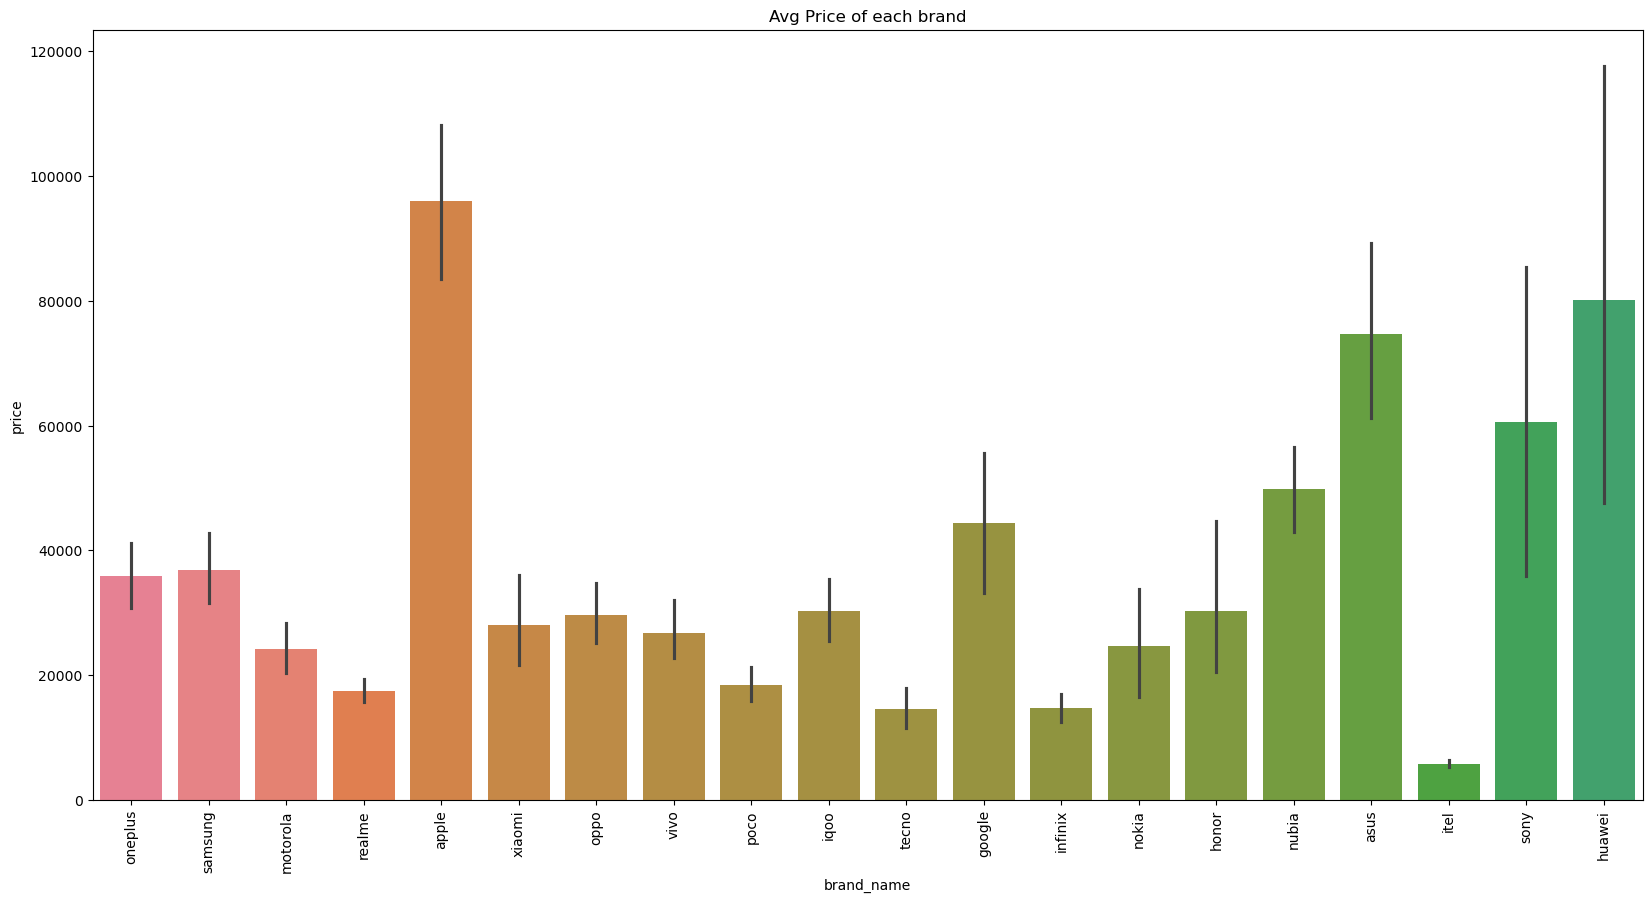

In [73]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('husl',50)
sns.barplot(data=temp_df,x = 'brand_name',y = 'price',palette=colors)
plt.title('Avg Price of each brand')
plt.xticks(rotation= 'vertical');

### rating vs price

<Axes: xlabel='rating', ylabel='price'>

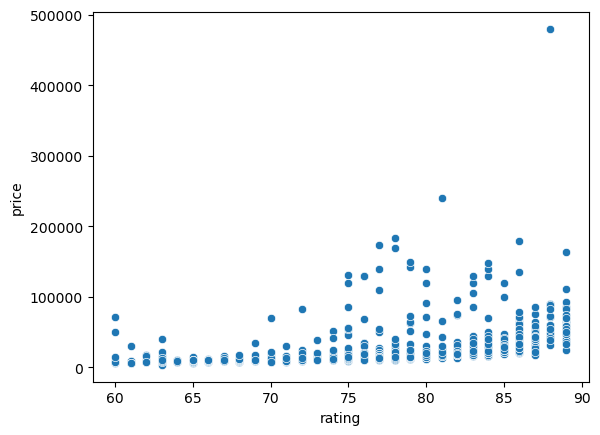

In [75]:
sns.scatterplot(data=temp_df,x='rating',y = 'price')

### 5g/nfc/ir_blaster vs price 

Text(0.5, 1.0, 'ir_blaster vs price')

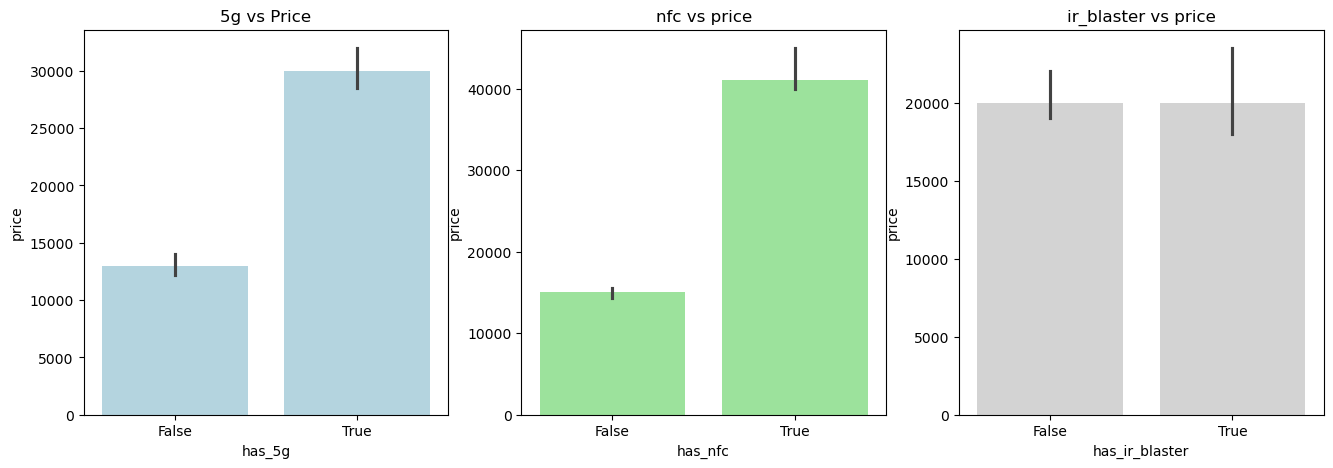

In [77]:
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
sns.barplot(data = temp_df,x='has_5g',y = 'price',estimator = np.median,color = 'lightblue')
plt.title('5g vs Price')
plt.subplot(1,3,2)
sns.barplot(data = temp_df,x='has_nfc',y = 'price',estimator = np.median,color = 'lightgreen')
plt.title('nfc vs price')
plt.subplot(1,3,3)
sns.barplot(data = temp_df,x='has_ir_blaster',y = 'price',estimator = np.median,color = 'lightgrey')
plt.title('ir_blaster vs price')

Text(0.5, 1.0, 'Cores vs Price')

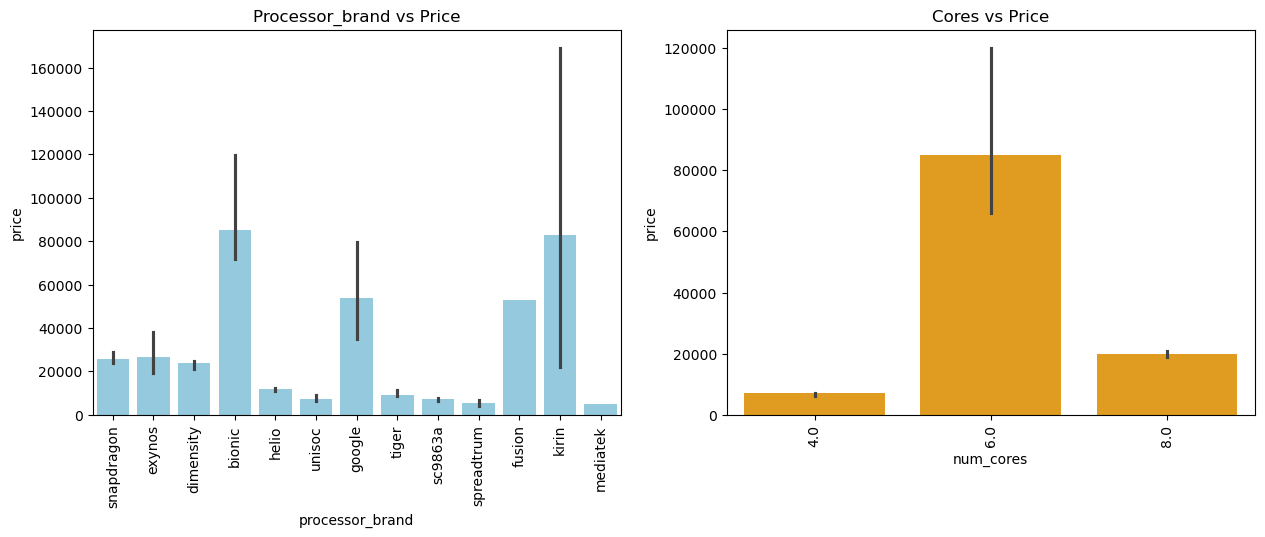

In [78]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.barplot(data = temp_df,x='processor_brand',y = 'price',estimator = np.median,color = 'skyblue')
plt.xticks(rotation='vertical');
plt.title('Processor_brand vs Price')
plt.subplot(1,2,2)
sns.barplot(data = temp_df,x='num_cores',y = 'price',estimator = np.median,color = 'orange')
plt.xticks(rotation='vertical');
plt.title('Cores vs Price')

In [79]:
pd.crosstab(df['num_cores'],df['os'])

os,android,ios,other
num_cores,,,
4.0,33,1,1
6.0,0,39,0
8.0,875,1,10


<Axes: xlabel='processor_speed', ylabel='price'>

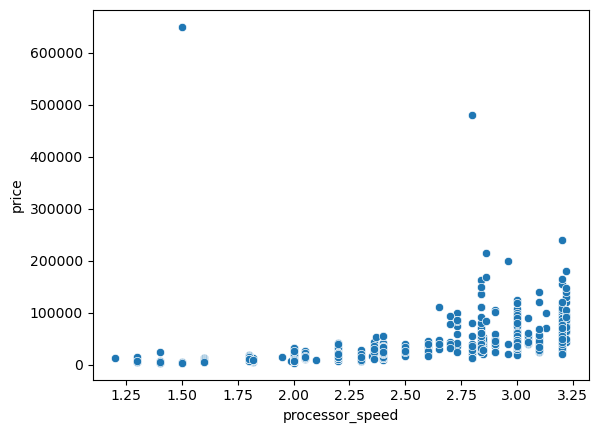

In [80]:
sns.scatterplot(data=df,x = 'processor_speed',y='price')

Text(0.5, 1.0, 'Screen Size vs Price')

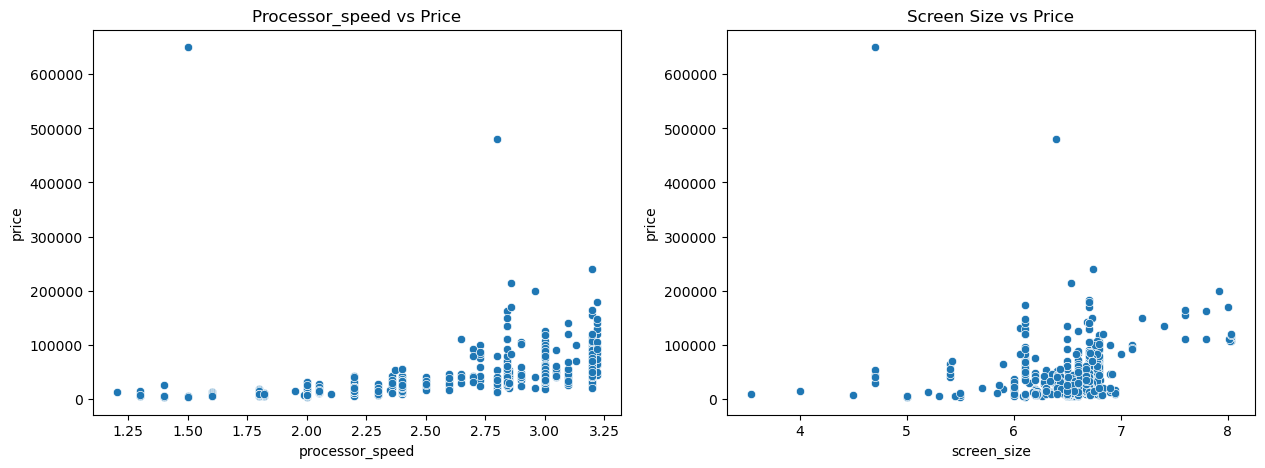

In [81]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.scatterplot(data=df,x = 'processor_speed',y='price')
plt.title('Processor_speed vs Price')
plt.subplot(1,2,2)
sns.scatterplot(data=df,x = 'screen_size',y='price')
plt.title('Screen Size vs Price')